### Basic dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Low pass filter

In [2]:
Dt = 0.05
times = np.arange(0,5.0,Dt)

N_t = len(times)
U = np.zeros((N_t,1))
X = np.zeros((N_t,1))
Z = np.zeros((N_t,1))

u,x,z = 0,0,0
T = 0.2
for it,t in enumerate(times):
    
    if t>1:
        u = 1.0
       
    x += Dt/T*(u - x)
    z = x  
    
    U[it,0] = u
    X[it,0] = x
    Z[it,0] = z

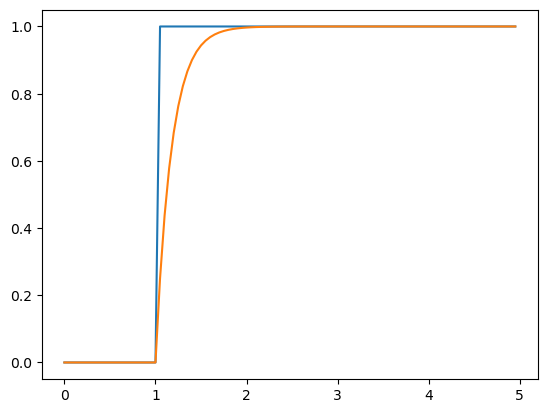

In [3]:
fig,axes = plt.subplots(nrows=1)

axes.plot(times,  U)
axes.plot(times,  Z)

#### Washout filter

In [4]:
Dt = 0.01
times = np.arange(0,5.0,Dt)

N_t = len(times)
U = np.zeros((N_t,1))
X = np.zeros((N_t,1))
Z = np.zeros((N_t,1))

u,x,z = 0,0,0
T = 0.2
for it,t in enumerate(times):
    
    if t>1:
        u = 1.0
       
    x += Dt/T*(u - x)
    z = (u - x) 
    
    U[it,0] = u
    X[it,0] = x
    Z[it,0] = z

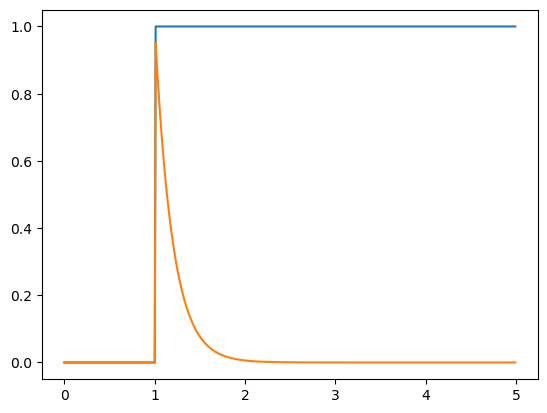

In [5]:
fig,axes = plt.subplots(nrows=1)

axes.plot(times,  U)
axes.plot(times,  Z)

### Lead Lag

In [6]:
### design
angle = -np.pi/4
omega = 2*np.pi*1

alpha = (1+np.sin(angle))/(1-np.sin(angle))
T_2 = 1/(omega*np.sqrt(alpha))
T_1 = alpha*T_2
s = 1j*omega
K = np.abs((T_1*s + 1)/(T_2*s + 1))

print(f'T_1 = {T_1} s, T_2 = {T_2} s, K: {K}')

### simulation   

Dt = 0.001
times = np.arange(0,5.0,Dt)

N_t = len(times)
U = np.zeros((N_t,1))
X = np.zeros((N_t,1))
Z = np.zeros((N_t,1))

u,x,z = 0,0,0

for it,t in enumerate(times):
    
    
    u = np.sin(omega*t)
       
    x += Dt*(u - x)/T_2
    z = ((u - x)*T_1/T_2 + x)/K

    U[it,0] = u
    X[it,0] = x
    Z[it,0] = z

T_1 = 0.06592413594738117 s, T_2 = 0.38423402213117186 s, K: 0.41421356237309503


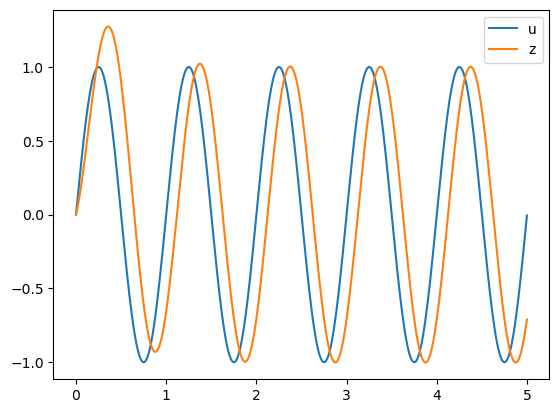

In [7]:
fig,axes = plt.subplots(nrows=1)

axes.plot(times,  U, label='u')
axes.plot(times,  Z, label='z')
axes.legend()

### Derivative

In [8]:
Dt = 0.01
times = np.arange(0,5.0,Dt)

N_t = len(times)
U = np.zeros((N_t,1))
X = np.zeros((N_t,1))
Z = np.zeros((N_t,1))

u,x,z = 0,0,0


T_d = 0.1

for it,t in enumerate(times):
    
    
    u = np.sin(2*t)
       
    x += Dt*(u - x)/T_d
    z = (u - x)/T_d

    U[it,0] = u
    X[it,0] = x
    Z[it,0] = z

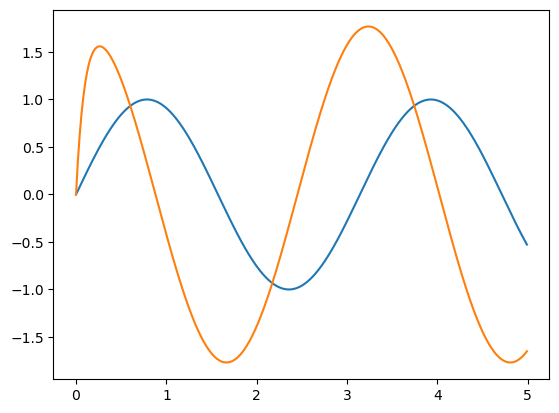

In [9]:
fig,axes = plt.subplots(nrows=1)

axes.plot(times,  U)
axes.plot(times,  Z)

### Proportional-Integral (PI) controller

In [10]:
### Plant
# G = 1/(M*s + D)    
M = 0.2
D = 1.0

### design
zeta = 1
omega = 2.0
K_p = 2*zeta*omega*M-D
K_i = M*omega**2

print(f'K_p = {K_p}, K_i = {K_i}')

### simulation   

Dt = 0.001
times = np.arange(0,5.0,Dt)

N_t = len(times)
U = np.zeros((N_t,1))
X = np.zeros((N_t,1))
Z = np.zeros((N_t,1))
Z_ref = np.zeros((N_t,1))

u,x,z = 0,0,0
xi = 0.0

for it,t in enumerate(times):
    
    z_ref = 0.0
    if t > 1.0:
        z_ref = 1.0
        
    epsilon = z_ref - z
       
    x += Dt*(u - D*x)/M   # plant
    z = x
    xi += Dt*epsilon   # PI CTRL
    u = K_p*epsilon + K_i*xi

    U[it,0] = u
    X[it,0] = x
    Z[it,0] = z
    Z_ref[it,0] = z_ref

K_p = -0.19999999999999996, K_i = 0.8


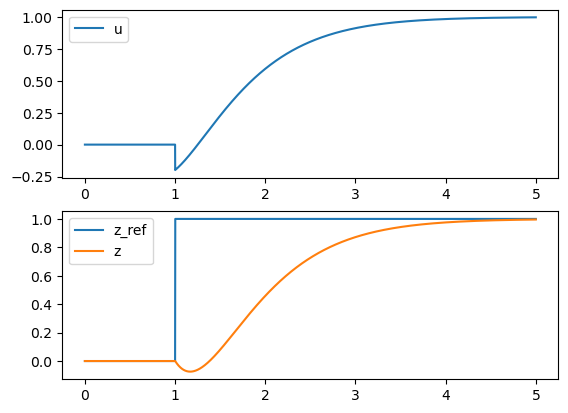

In [11]:
fig,axes = plt.subplots(nrows=2)

axes[0].plot(times,  U, label='u')
axes[1].plot(times,  Z_ref, label='z_ref')                        
axes[1].plot(times,  Z, label='z')
axes[0].legend()
axes[1].legend()